<a href="https://colab.research.google.com/github/Professional50coder/KJSIT-AILabs/blob/main/Book_rec_system_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

# Load the dataset
books_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/books.csv')

def search_books(keyword):
    """
    Search for books that match the keyword in the title, authors, or publisher.
    """
    keyword = keyword.lower()
    results = books_df[
        books_df['title'].str.lower().str.contains(keyword) |
        books_df['authors'].str.lower().str.contains(keyword) |
        books_df['publisher'].str.lower().str.contains(keyword)
    ]
    return results


def display_books(books):
    """
    Display the list of books.
    """
    if books.empty:
        print("No books found.")
    else:
        for index, book in books.iterrows():
            print(f"Title: {book['title']}")
            print(f"Author: {book['authors']}")
            print(f"Average Rating: {book['average_rating']}")
            print(f"ISBN: {book['isbn']}")
            print(f"ISBN13: {book['isbn13']}")
            print(f"Language: {book['language_code']}")
            # Check if 'num_pages' column exists before printing
            if 'num_pages' in book:
                print(f"Number of Pages: {book['num_pages']}")
            print(f"Ratings Count: {book['ratings_count']}")
            print(f"Text Reviews Count: {book['text_reviews_count']}")
            print(f"Publication Date: {book['publication_date']}")
            print(f"Publisher: {book['publisher']}")
            print('-' * 40)

def main():
    print("Welcome to the Book Recommendation Program!")
    keyword = input("Enter a keyword to search for books: ")
    results = search_books(keyword)
    display_books(results)

if __name__ == "__main__":
    main()


Welcome to the Book Recommendation Program!
Enter a keyword to search for books: Mark Twain
Title: The Innocents Abroad
Author: Mark Twain/Grover Gardner
Average Rating: 3.86
ISBN: 812967054
ISBN13: 9.78081E+12
Language: eng
Ratings Count: 8879
Text Reviews Count: 693
Publication Date: 02-11-2003
Publisher: Modern Library
----------------------------------------
Title: The Tragedy of Pudd'nhead Wilson/Those Extraordinary Twins
Author: Mark Twain/David Lionel Smith/Sherley Anne Williams
Average Rating: 3.79
ISBN: 195114159
ISBN13: 9.7802E+12
Language: eng
Ratings Count: 3664
Text Reviews Count: 58
Publication Date: 03-06-1997
Publisher: Oxford University Press  USA
----------------------------------------
Title: The Tragedy of Pudd'nhead Wilson
Author: Mark Twain/Michael Prichard
Average Rating: 3.79
ISBN: 140015068X
ISBN13: 9.7814E+12
Language: eng
Ratings Count: 3
Text Reviews Count: 0
Publication Date: 01-01-2003
Publisher: Tantor Media
----------------------------------------
Title:

In [9]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [10]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [11]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


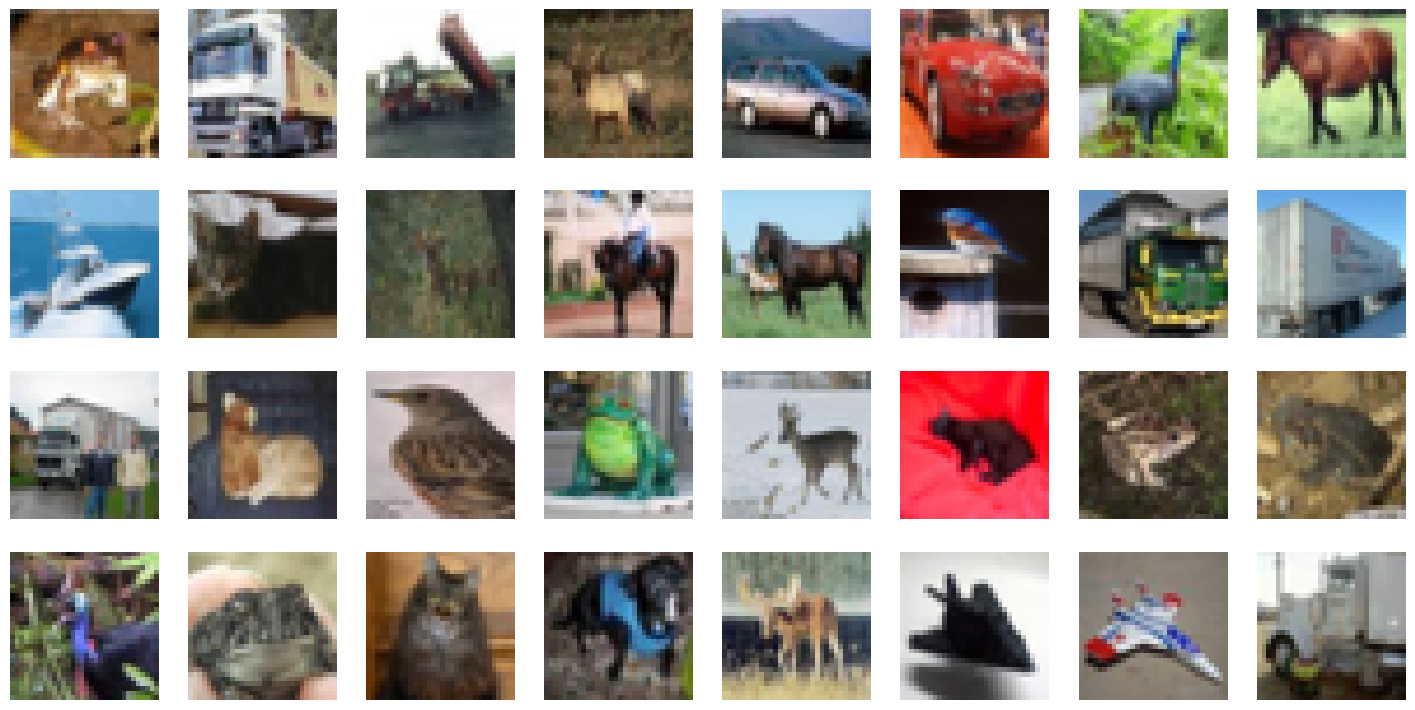

In [12]:
plt.figure(figsize=(18, 9))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

In [13]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

In [15]:
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [16]:
# Create the model.
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

In [18]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/31
137/137 [==============================] - 10s 35ms/step - loss: 2.0948 - accuracy: 0.2342 - val_loss: 2.1195 - val_accuracy: 0.1957
Epoch 2/31
137/137 [==============================] - 3s 20ms/step - loss: 1.7053 - accuracy: 0.3786 - val_loss: 1.5197 - val_accuracy: 0.4465
Epoch 3/31
137/137 [==============================] - 3s 20ms/step - loss: 1.4813 - accuracy: 0.4646 - val_loss: 1.3564 - val_accuracy: 0.4987
Epoch 4/31
137/137 [==============================] - 3s 20ms/step - loss: 1.3319 - accuracy: 0.5227 - val_loss: 1.2352 - val_accuracy: 0.5606
Epoch 5/31
137/137 [==============================] - 3s 23ms/step - loss: 1.1997 - accuracy: 0.5746 - val_loss: 1.2933 - val_accuracy: 0.5535
Epoch 6/31
137/137 [==============================] - 3s 20ms/step - loss: 1.0713 - accuracy: 0.6197 - val_loss: 1.1190 - val_accuracy: 0.6013
Epoch 7/31
137/137 [==============================] - 3s 22ms/step - loss: 0.9589 - accuracy: 0.6588 - val_loss: 0.9913 - val_accuracy: 0.657

In [19]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

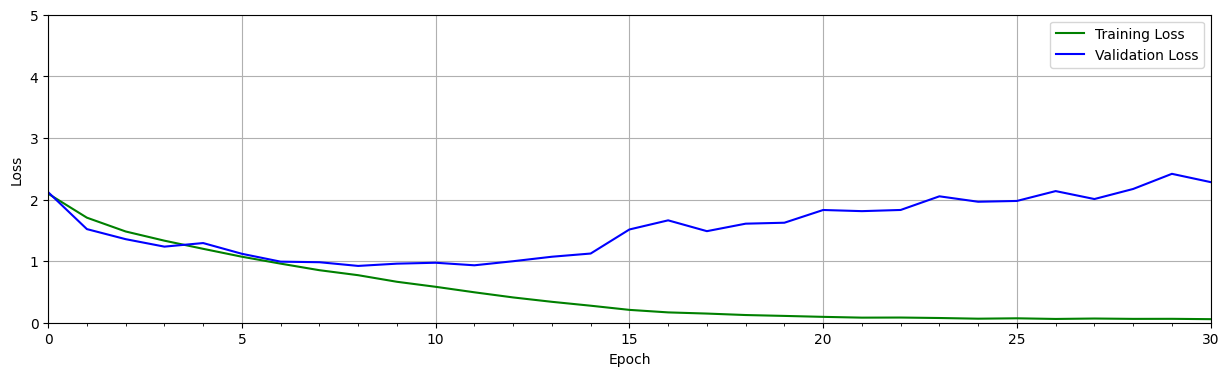

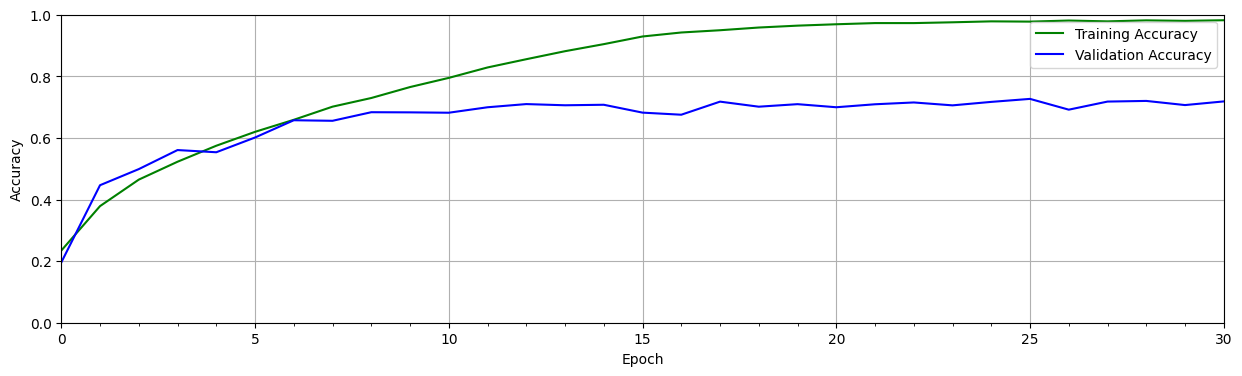

In [20]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [21]:
def cnn_model_dropout(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [22]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [23]:
model_dropout.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'],
                     )

In [24]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            epochs=TrainingConfig.EPOCHS,
                            verbose=1,
                            validation_split=.3,
                           )

Epoch 1/31
137/137 [==============================] - 7s 33ms/step - loss: 2.1379 - accuracy: 0.2087 - val_loss: 1.8778 - val_accuracy: 0.3247
Epoch 2/31
137/137 [==============================] - 4s 26ms/step - loss: 1.8427 - accuracy: 0.3294 - val_loss: 1.6629 - val_accuracy: 0.3819
Epoch 3/31
137/137 [==============================] - 4s 27ms/step - loss: 1.6361 - accuracy: 0.4083 - val_loss: 1.5008 - val_accuracy: 0.4632
Epoch 4/31
137/137 [==============================] - 4s 30ms/step - loss: 1.4889 - accuracy: 0.4623 - val_loss: 1.3591 - val_accuracy: 0.4995
Epoch 5/31
137/137 [==============================] - 4s 30ms/step - loss: 1.3830 - accuracy: 0.5053 - val_loss: 1.4192 - val_accuracy: 0.5002
Epoch 6/31
137/137 [==============================] - 4s 29ms/step - loss: 1.2783 - accuracy: 0.5428 - val_loss: 1.1666 - val_accuracy: 0.5782
Epoch 7/31
137/137 [==============================] - 4s 30ms/step - loss: 1.1849 - accuracy: 0.5745 - val_loss: 1.0430 - val_accuracy: 0.6289

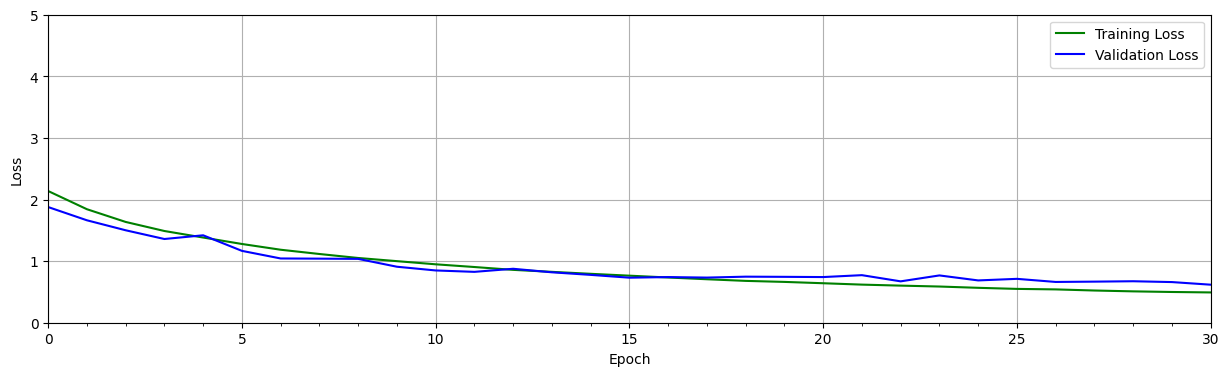

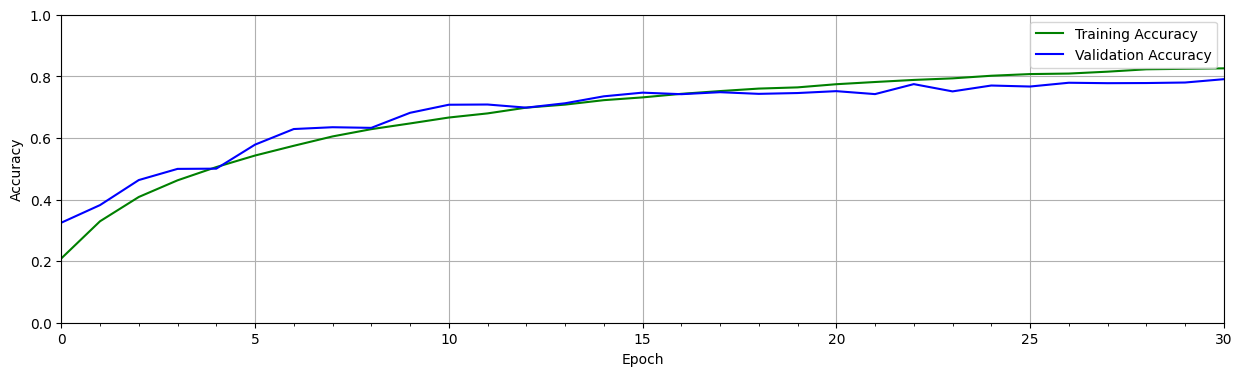

In [25]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [26]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format.
model_dropout.save('model_dropout')

In [27]:
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout')

In [28]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 [==============================] - 2s 4ms/step - loss: 0.6307 - accuracy: 0.7907
Test accuracy: 79.070


In [29]:
def evaluate_model(dataset, model):

    class_names = ['airplane',
                   'automobile',
                   'bird',
                   'cat',
                   'deer',
                   'dog',
                   'frog',
                   'horse',
                   'ship',
                   'truck' ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0:num_rows*num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={'fontsize':13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color='g')
        else:
            plt.setp(title_obj, color='r')

        acc = num_matches/(idx+1)
    print("Prediction accuracy: ", int(100*acc)/100)

    return

1/1 [==============================] - 0s 406ms/step
Prediction accuracy:  0.83


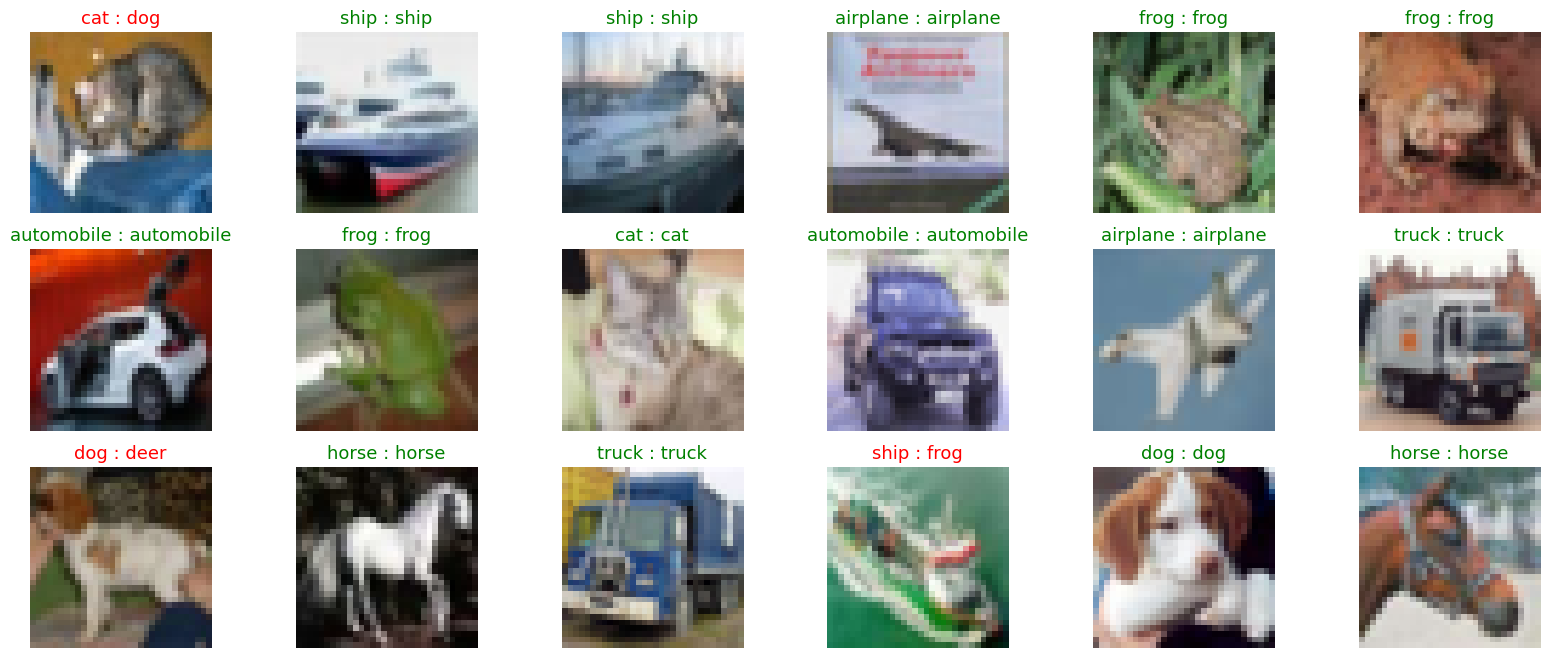

In [30]:
evaluate_model(X_test, reloaded_model_dropout)

In [31]:
# Generate predictions for the test dataset.
predictions = reloaded_model_dropout.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 1s 3ms/step


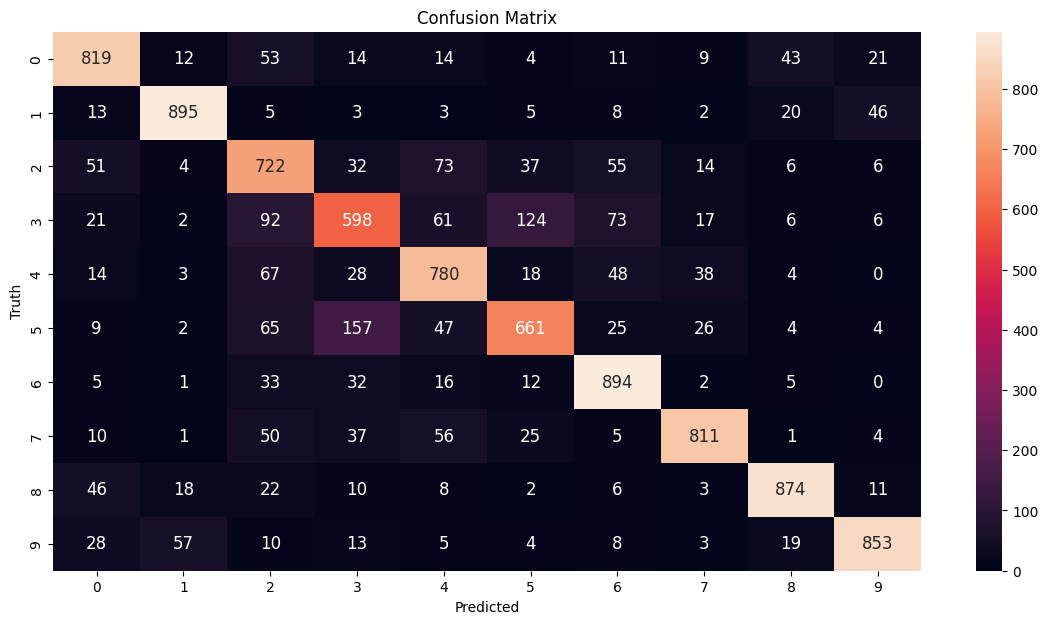

In [32]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[14, 7])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()